## Afan Oromo Hate Speech Classifier 

Dataset Credits: Afaan Oromo Facebook Posts and Comments Hate Speech Dataset by Baharudin Sherif (2022)

In [1]:
import pandas as pd

C:\Users\Abdulmunim\AppData\Local\Temp\ipykernel_17196\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data_src = "../data/"
labels_path = data_src + "Labels.xlsx"
posts_path = data_src + "Posts.xlsx"

In [3]:
posts = pd.read_excel(posts_path, header=None)
labels = pd.read_excel(labels_path, header=None)

In [4]:
posts.columns = ['post']
labels.columns = ['label']

In [5]:
data = pd.concat([posts, labels], axis=1)

In [6]:
from preprocessing.preprocessor import PreprocessingPipeline # for afan oromo

In [7]:
preprocessor = PreprocessingPipeline()

In [8]:
data['post'] = data['post'].apply(lambda x: preprocessor.process(x))

In [9]:
import matplotlib.pyplot as plt

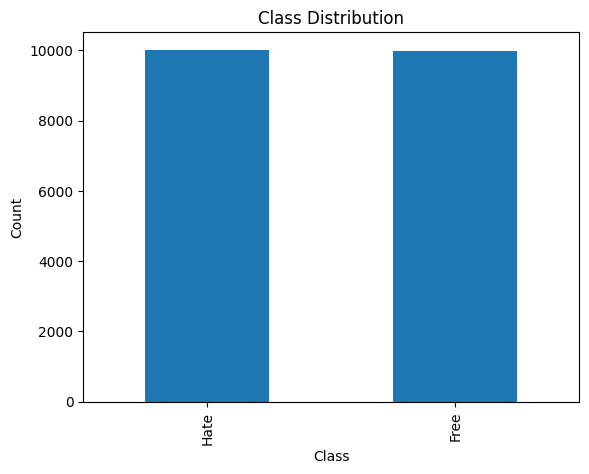

In [10]:
# Class distribution

data['label'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [11]:
# Post Length Distribution

data['post_length'] = data['post'].apply(lambda x: len(x.split()))

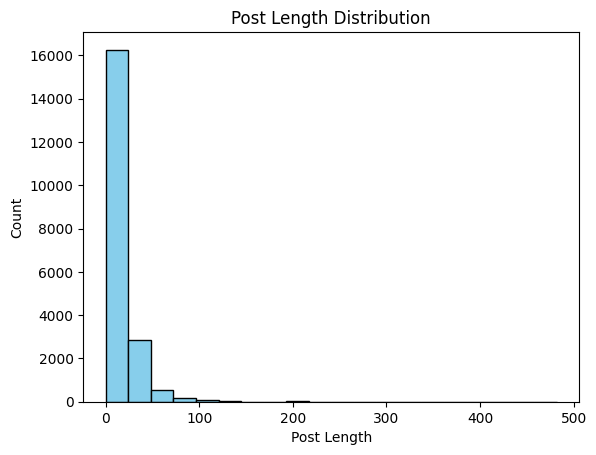

In [12]:
plt.hist(data['post_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Post Length Distribution')
plt.xlabel('Post Length')
plt.ylabel('Count')
plt.show()

In [13]:
from wordcloud import WordCloud

In [14]:
# Transform the Label, 0 - Free, 1 - Hate
data['label'] = data['label'].apply(lambda x: 0 if x == 'Free' else 1)

In [15]:
hate_posts = data[data['label'] == 1]['post']
free_posts = data[data['label'] == 0]['post']

# merge them to string
hate_posts = " ".join(hate_posts)
free_posts = " ".join(free_posts)

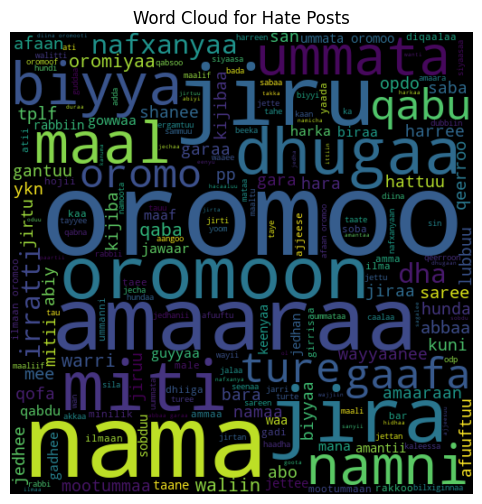

In [16]:
hate_wordcloud = WordCloud(width=512, height=512).generate(hate_posts)
# visualization
plt.figure(figsize=(12, 6))
plt.imshow(hate_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Hate Posts')
plt.axis('off')
plt.show()

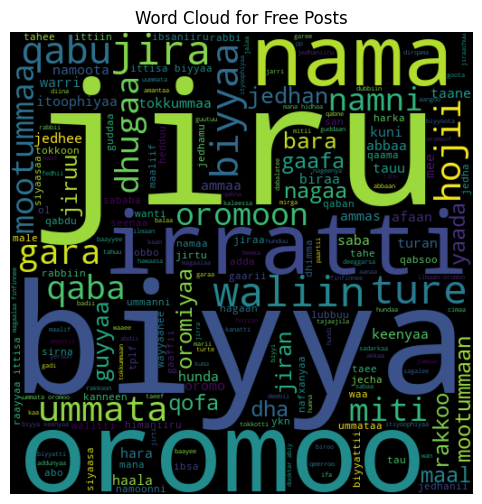

In [17]:

free_wordcloud = WordCloud(width=512, height=512).generate(free_posts)
plt.figure(figsize=(12, 6))
plt.imshow(free_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Free Posts')
plt.axis('off')
plt.show()

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [19]:
# Train Test Validation

X = data['post']
y = data['label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1309)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1309)

print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (14000,) (14000,)
Validation set shape: (3000,) (3000,)
Test set shape: (3000,) (3000,)


## Model 1: Logistic Regression

In [20]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [21]:
model = make_pipeline(TfidfVectorizer(), LogisticRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [22]:
predictions = model.predict(X_val) 

In [23]:
accuracy = accuracy_score(y_val, predictions)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.8286666666666667


## Model 2: Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
model = make_pipeline(CountVectorizer(), MultinomialNB())

In [26]:
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [27]:
accuracy = accuracy_score(y_val, model.predict(X_val))
print(f"Naive Bayes Accuracy: {accuracy}")

Naive Bayes Accuracy: 0.8013333333333333


## Model 3: Support Vector Machines (SVM)

In [29]:
from sklearn.svm import SVC

In [30]:
model = make_pipeline(TfidfVectorizer(), SVC())
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [31]:
accuracy = accuracy_score(y_val, model.predict(X_val))
print(f"SVM Accuracy: {accuracy}")

SVM Accuracy: 0.8163333333333334


## Model 4: Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
model.fit(X_train, y_train)

In [ ]:
accuracy = model.score(X_val, y_val)
print(f"Random Forest Accuracy: {accuracy}")

## Model 5: Gradient Boosting (XGBoost)

In [ ]:
import xgboost as xgboost

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

model = xgb.XGBClassifier()
model.fit(X_train_tfidf, y_train)

In [ ]:
accuracy = model.score(X_val_tfidf, y_val)
print(f"XGBoost Accuracy: {accuracy}")